# Breast Cancer Detection

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# !pip install imblearn

### Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)


#### Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
breast_cancer_dataset = pd.read_csv('data.csv')
breast_cancer_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Data Exploration

In [4]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Drop "ID" and "Unnamed: 32" features
# "ID": not useful.
# "Unnamed: 32": there are a lot of nulls

breast_cancer_dataset.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [6]:
# Split the data to train and test
X = breast_cancer_dataset.iloc[:, 1:]
y = breast_cancer_dataset.iloc[:, 0]

In [7]:
Malignant = X[breast_cancer_dataset['diagnosis']=='M']
Benign = X[breast_cancer_dataset['diagnosis']=='B']

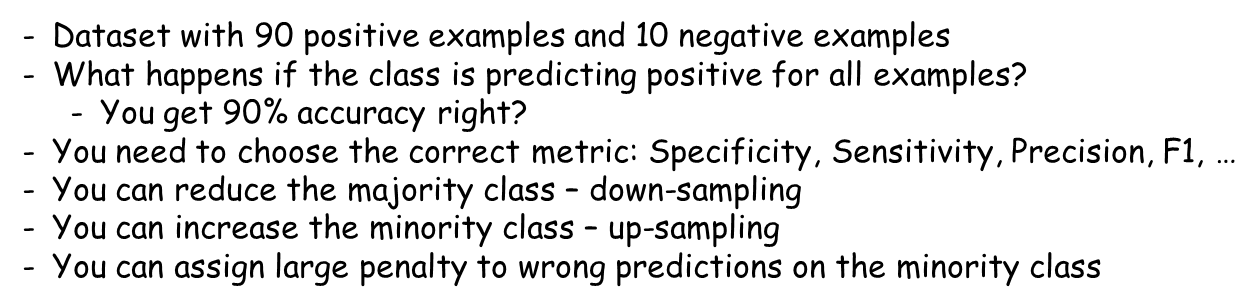

In [8]:
print('Malignant:', Malignant.shape[0])
print('Benign:', Benign.shape[0])

Malignant: 212
Benign: 357


In [917]:
MB_df = pd.DataFrame(columns=['Malignant', 'Benign'])
MB_df['Malignant']=[Malignant.shape[0]]
MB_df['Benign']=[Benign.shape[0]]
MB_df


,Malignant,Benign
0,212,357


Text(0, 0.5, 'Count')

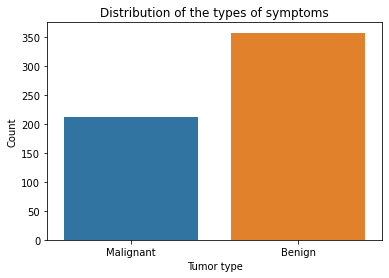

In [924]:
sns.barplot(data=MB_df)
plt.title('Distribution of the types of symptoms')
plt.xlabel('Tumor type')
plt.ylabel('Count')

In [10]:
# Display the unique classes 
breast_cancer_dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Text(0.5, 1.0, 'Correlation between features using heatmap')

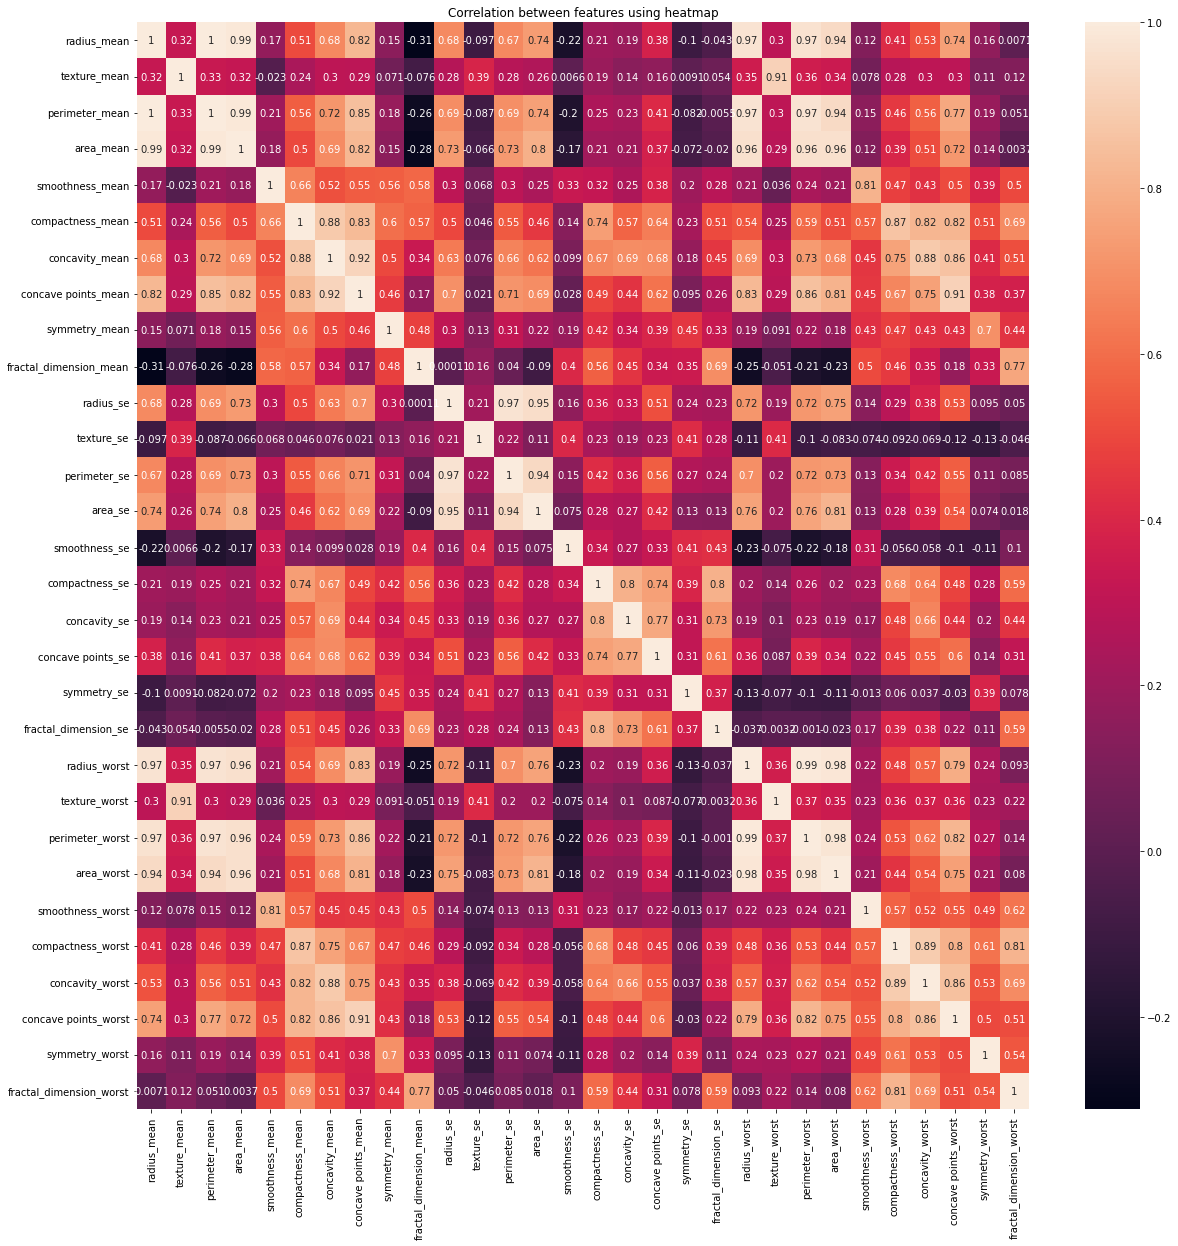

In [12]:
plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True)

plt.title('Correlation between features using heatmap')

## Data Cleaning

In [451]:
X.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst'], inplace=True, axis=1)

In [452]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   concave points_mean      569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_se                569 non-null    float64
 9   texture_se               569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5

In [807]:
sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [657]:
# Drop Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    
    out = df[ (df[column] < lower_extreme) | (df[column] > upper_extreme) ].index
    
    new_df = df.drop(out)
    return new_df

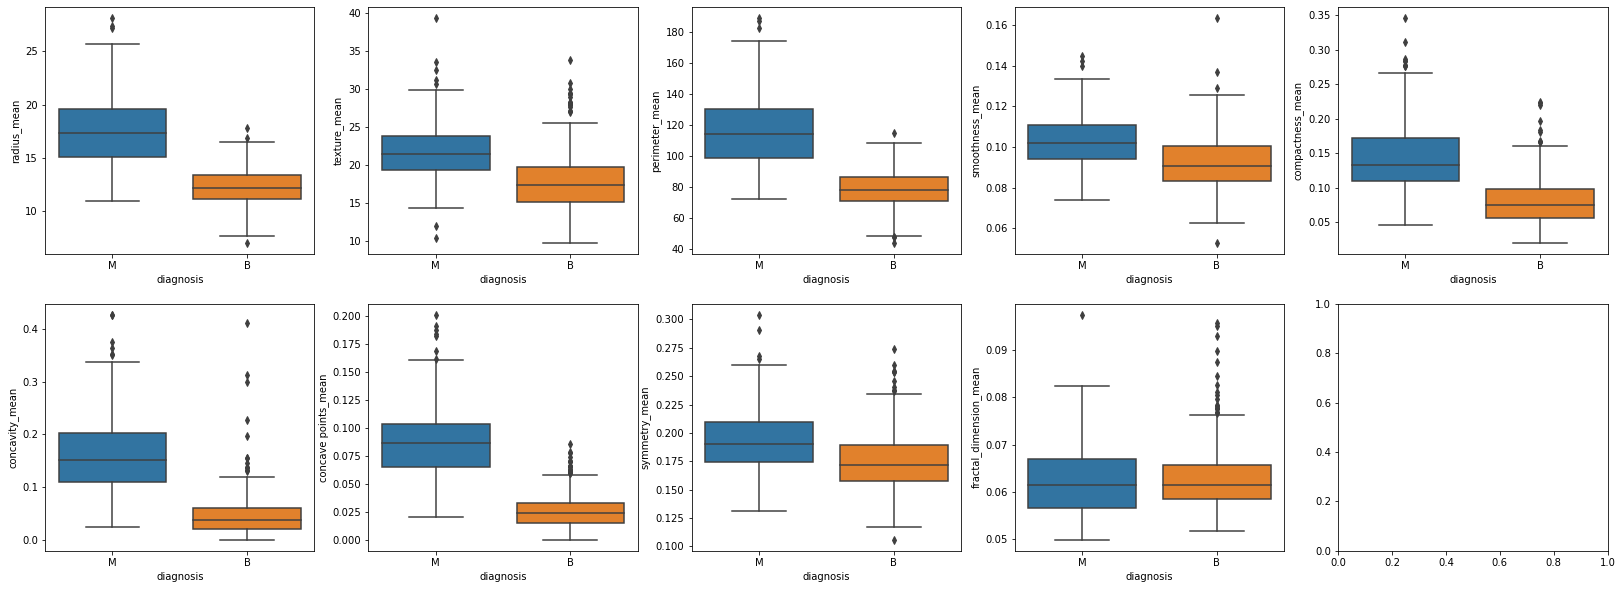

In [658]:
# means section
fig, ax = plt.subplots(2, 5, figsize=(28, 10))
sns.boxplot(y=breast_cancer_dataset["radius_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][0])
sns.boxplot(y=breast_cancer_dataset["texture_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][1])
sns.boxplot(y=breast_cancer_dataset["perimeter_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][2])
sns.boxplot(y=breast_cancer_dataset["smoothness_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][3])
sns.boxplot(y=breast_cancer_dataset["compactness_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][4])
sns.boxplot(y=breast_cancer_dataset["concavity_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][0])
sns.boxplot(y=breast_cancer_dataset["concave points_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][1])
sns.boxplot(y=breast_cancer_dataset["symmetry_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][2])
sns.boxplot(y=breast_cancer_dataset["fractal_dimension_mean"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][3])
plt.show()


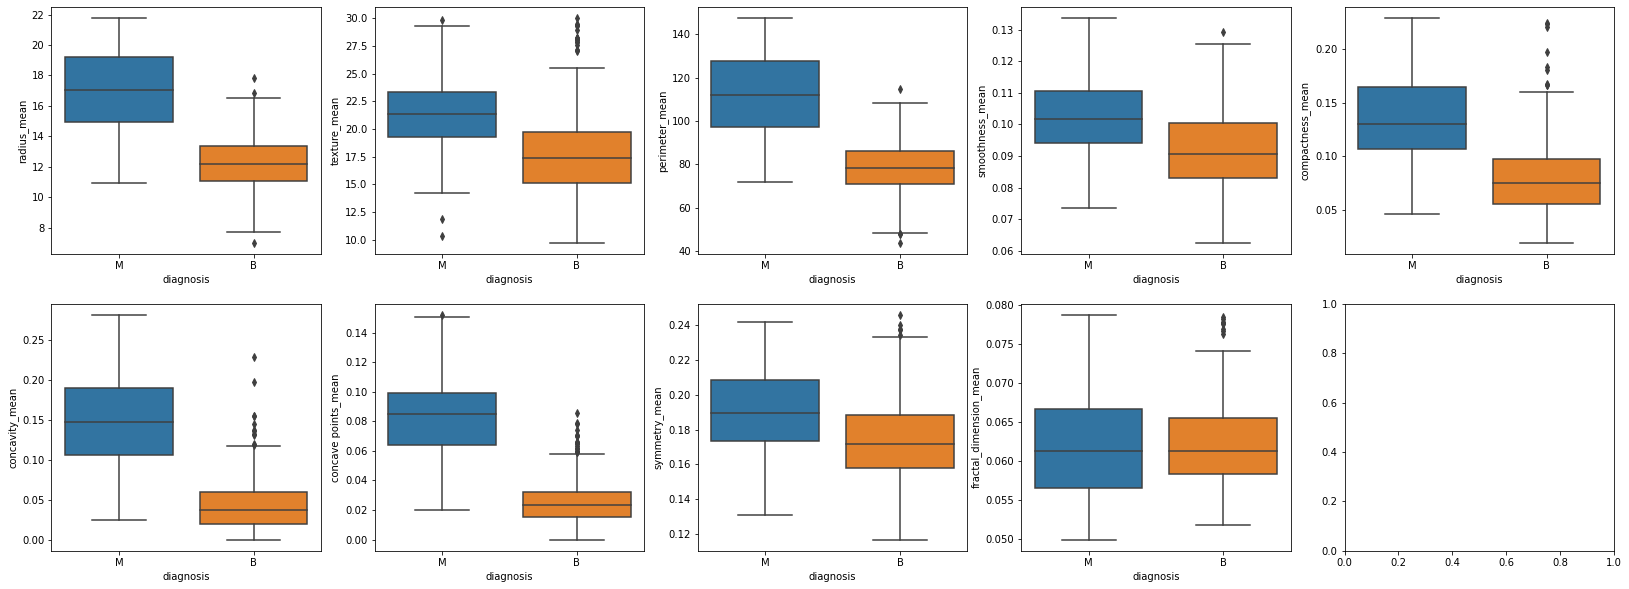

In [659]:
radius_mean = remove_outliers(breast_cancer_dataset, 'radius_mean')
texture_mean = remove_outliers(breast_cancer_dataset, 'texture_mean')
perimeter_mean = remove_outliers(breast_cancer_dataset, 'perimeter_mean')
smoothness_mean = remove_outliers(breast_cancer_dataset, 'smoothness_mean')
compactness_mean = remove_outliers(breast_cancer_dataset, 'compactness_mean')
concavity_mean = remove_outliers(breast_cancer_dataset, 'concavity_mean')
concave_points_mean = remove_outliers(breast_cancer_dataset, 'concave points_mean')
symmetry_mean = remove_outliers(breast_cancer_dataset, 'symmetry_mean')
fractal_dimension_mean = remove_outliers(breast_cancer_dataset, 'fractal_dimension_mean')

fig, ax = plt.subplots(2, 5, figsize=(28, 10))
sns.boxplot(y=radius_mean['radius_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][0])
sns.boxplot(y=texture_mean['texture_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][1])
sns.boxplot(y=perimeter_mean['perimeter_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][2])
sns.boxplot(y=smoothness_mean['smoothness_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][3])
sns.boxplot(y=compactness_mean['compactness_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][4])
sns.boxplot(y=concavity_mean['concavity_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][0])
sns.boxplot(y=concave_points_mean['concave points_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][1])
sns.boxplot(y=symmetry_mean['symmetry_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][2])
sns.boxplot(y=fractal_dimension_mean['fractal_dimension_mean'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][3])
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_se'>

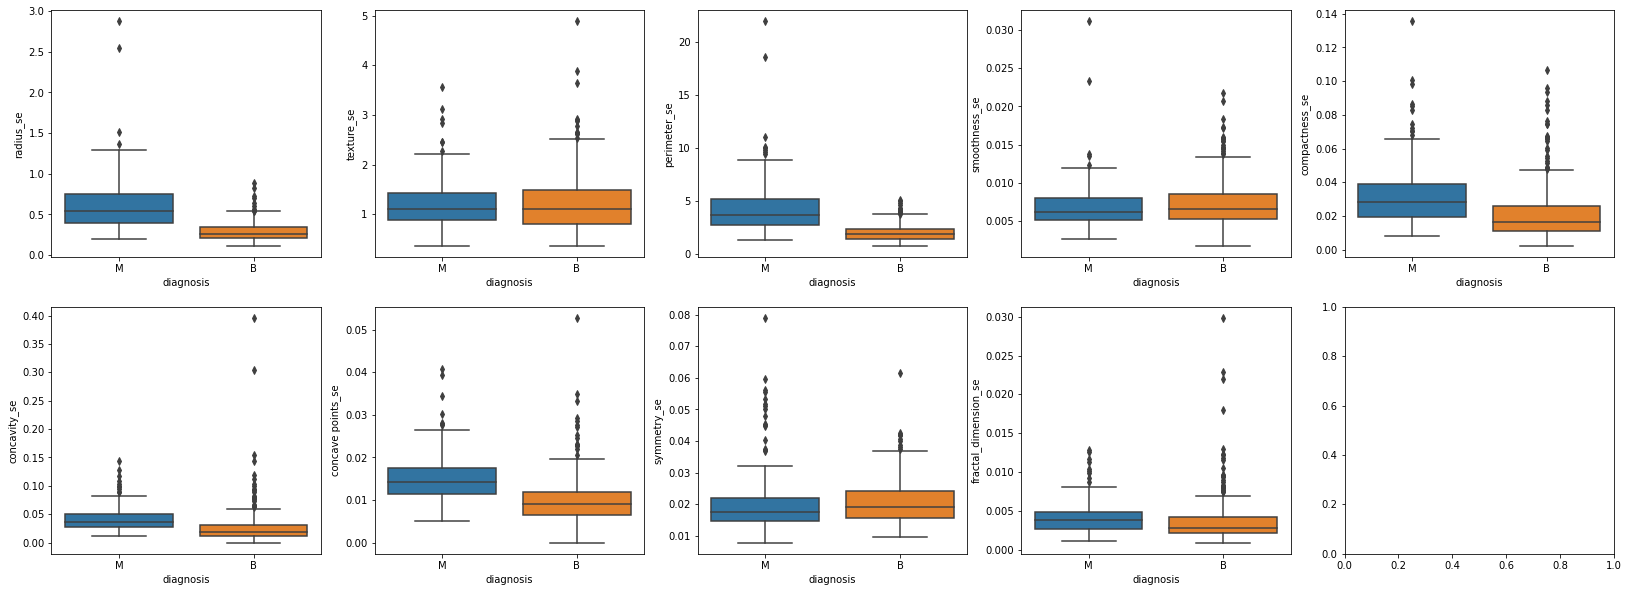

In [660]:
# se section
fig, ax = plt.subplots(2, 5, figsize=(28, 10))
sns.boxplot(y=breast_cancer_dataset["radius_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][0])
sns.boxplot(y=breast_cancer_dataset["texture_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][1])
sns.boxplot(y=breast_cancer_dataset["perimeter_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][2])
sns.boxplot(y=breast_cancer_dataset["smoothness_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][3])
sns.boxplot(y=breast_cancer_dataset["compactness_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][4])
sns.boxplot(y=breast_cancer_dataset["concavity_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][0])
sns.boxplot(y=breast_cancer_dataset["concave points_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][1])
sns.boxplot(y=breast_cancer_dataset["symmetry_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][2])
sns.boxplot(y=breast_cancer_dataset["fractal_dimension_se"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][3])

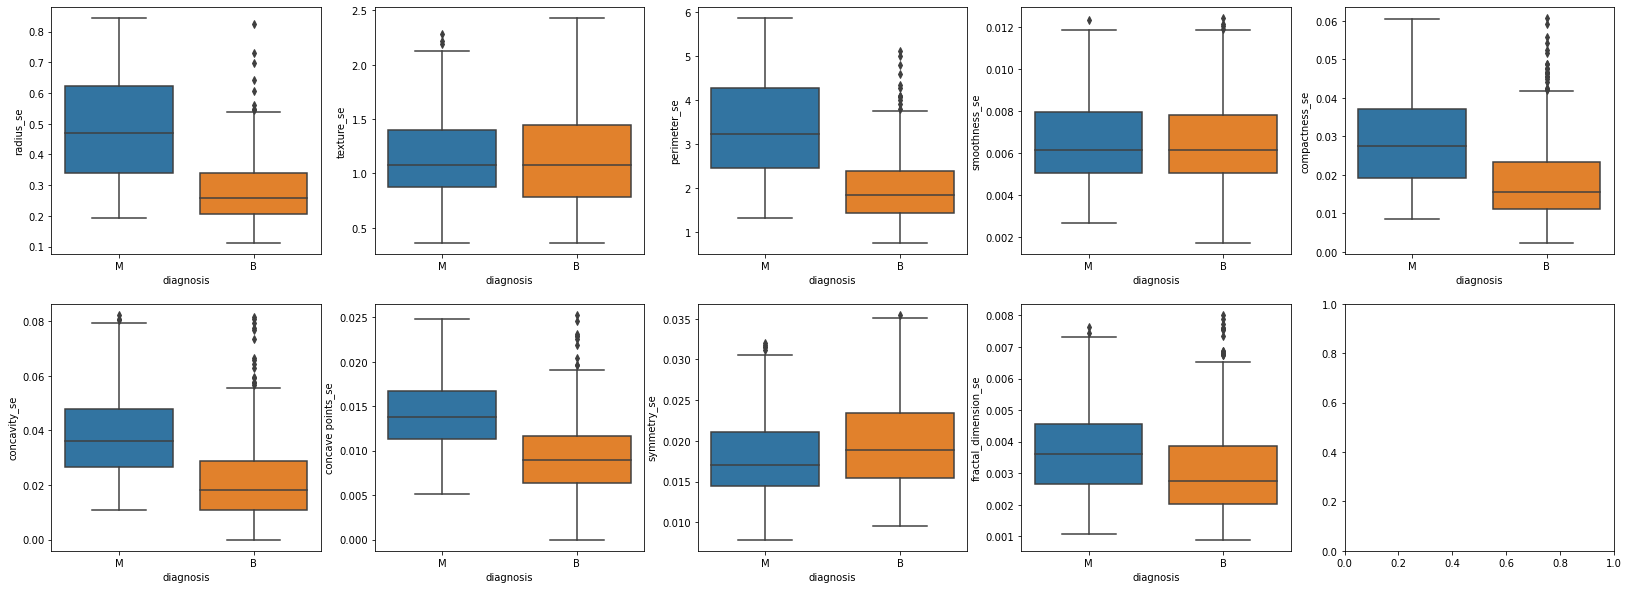

In [661]:
radius_se = remove_outliers(breast_cancer_dataset, 'radius_se')
texture_se = remove_outliers(breast_cancer_dataset, 'texture_se')
perimeter_se = remove_outliers(breast_cancer_dataset, 'perimeter_se')
smoothness_se = remove_outliers(breast_cancer_dataset, 'smoothness_se')
compactness_se = remove_outliers(breast_cancer_dataset, 'compactness_se')
concavity_se = remove_outliers(breast_cancer_dataset, 'concavity_se')
concave_points_se = remove_outliers(breast_cancer_dataset, 'concave points_se')
symmetry_se = remove_outliers(breast_cancer_dataset, 'symmetry_se')
fractal_dimension_se = remove_outliers(breast_cancer_dataset, 'fractal_dimension_se')

fig, ax = plt.subplots(2, 5, figsize=(28, 10))
sns.boxplot(y=radius_se['radius_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][0])
sns.boxplot(y=texture_se['texture_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][1])
sns.boxplot(y=perimeter_se['perimeter_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][2])
sns.boxplot(y=smoothness_se['smoothness_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][3])
sns.boxplot(y=compactness_se['compactness_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][4])
sns.boxplot(y=concavity_se['concavity_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][0])
sns.boxplot(y=concave_points_se['concave points_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][1])
sns.boxplot(y=symmetry_se['symmetry_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][2])
sns.boxplot(y=fractal_dimension_se['fractal_dimension_se'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][3])
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_worst'>

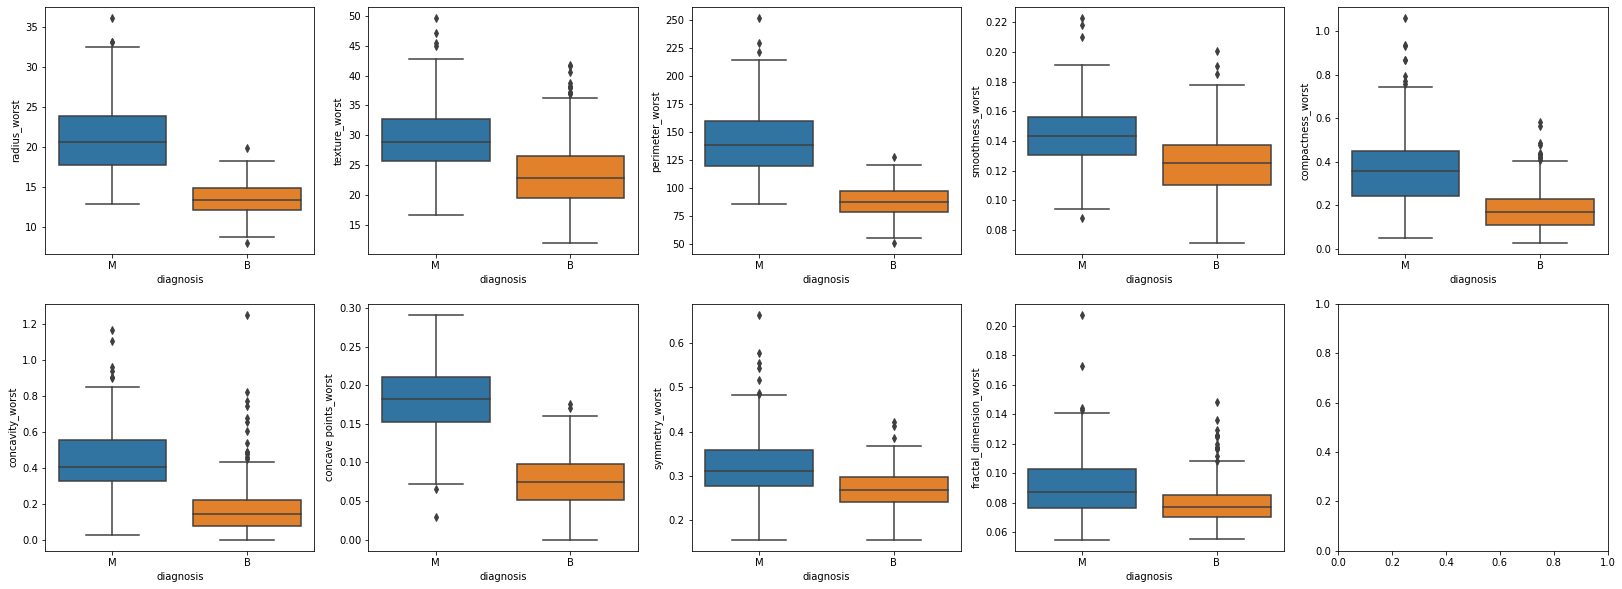

In [662]:
# worst section
fig, ax = plt.subplots(2, 5, figsize=(28, 10))
sns.boxplot(y=breast_cancer_dataset["radius_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][0])
sns.boxplot(y=breast_cancer_dataset["texture_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][1])
sns.boxplot(y=breast_cancer_dataset["perimeter_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][2])
sns.boxplot(y=breast_cancer_dataset["smoothness_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][3])
sns.boxplot(y=breast_cancer_dataset["compactness_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[0][4])
sns.boxplot(y=breast_cancer_dataset["concavity_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][0])
sns.boxplot(y=breast_cancer_dataset["concave points_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][1])
sns.boxplot(y=breast_cancer_dataset["symmetry_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][2])
sns.boxplot(y=breast_cancer_dataset["fractal_dimension_worst"], x=breast_cancer_dataset["diagnosis"], ax=ax[1][3])

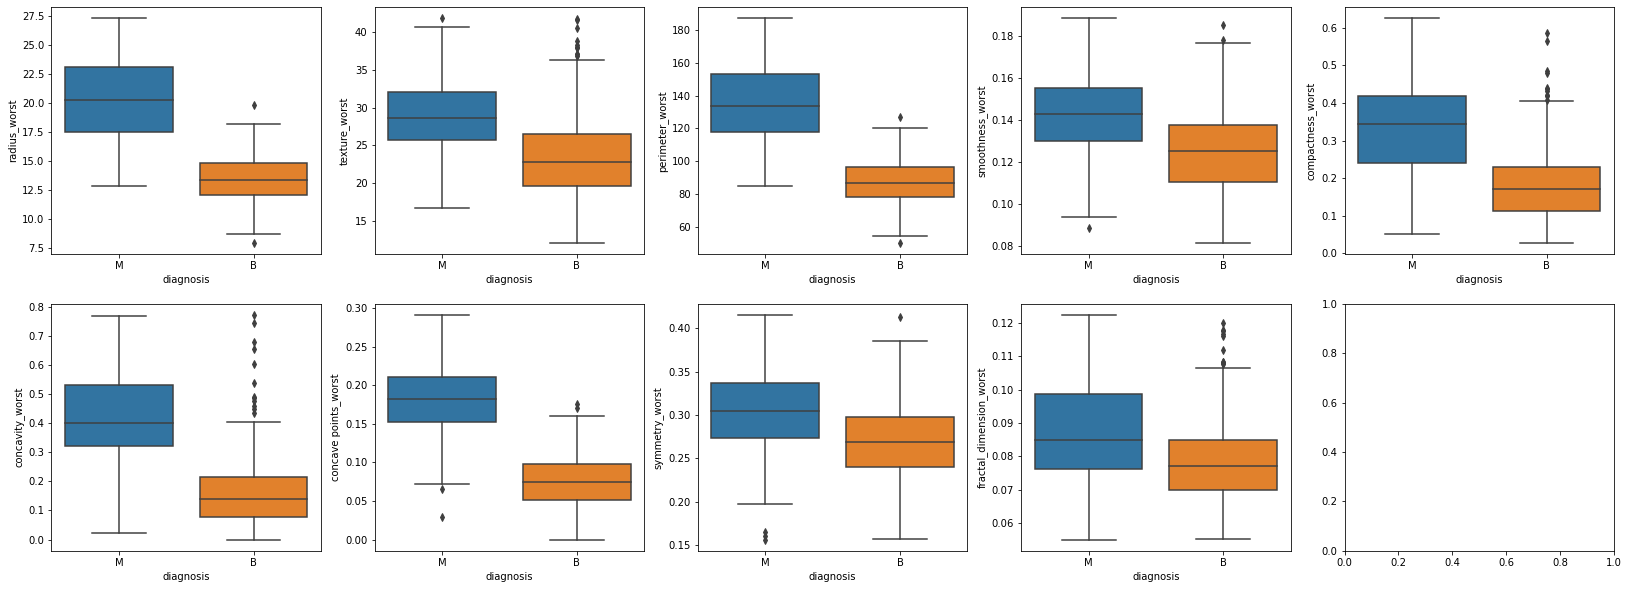

In [663]:
radius_worst = remove_outliers(breast_cancer_dataset, 'radius_worst')
texture_worst = remove_outliers(breast_cancer_dataset, 'texture_worst')
perimeter_worst = remove_outliers(breast_cancer_dataset, 'perimeter_worst')
smoothness_worst = remove_outliers(breast_cancer_dataset, 'smoothness_worst')
compactness_worst = remove_outliers(breast_cancer_dataset, 'compactness_worst')
concavity_worst = remove_outliers(breast_cancer_dataset, 'concavity_worst')
concave_points_worst = remove_outliers(breast_cancer_dataset, 'concave points_worst')
symmetry_worst = remove_outliers(breast_cancer_dataset, 'symmetry_worst')
fractal_dimension_worst = remove_outliers(breast_cancer_dataset, 'fractal_dimension_worst')

fig, ax = plt.subplots(2, 5, figsize=(28, 10))
sns.boxplot(y=radius_worst['radius_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][0])
sns.boxplot(y=texture_worst['texture_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][1])
sns.boxplot(y=perimeter_worst['perimeter_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][2])
sns.boxplot(y=smoothness_worst['smoothness_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][3])
sns.boxplot(y=compactness_worst['compactness_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[0][4])
sns.boxplot(y=concavity_worst['concavity_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][0])
sns.boxplot(y=concave_points_worst['concave points_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][1])
sns.boxplot(y=symmetry_worst['symmetry_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][2])
sns.boxplot(y=fractal_dimension_worst['fractal_dimension_worst'], x=breast_cancer_dataset["diagnosis"], ax=ax[1][3])
plt.show()

## Preprocessing & Modeling & Evaluation

### Formula
  - Standarization:   
         Xi - Mean / Standard Deviation

In [814]:
scaler = StandardScaler()

In [815]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

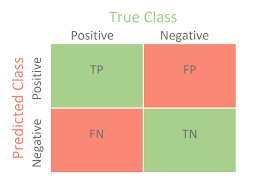

-  TP: The number of true positives classified by the model.

-  FN: The number of false negatives classified by the model.

-  FP: The number of false positives classified by the model.

-  TN: The number of true negatives classified by the model.

### Formulas:

    - precision_score = TP / (TP + FP)

    - recall_score = TP / (TP + FN)

    - f1_score = 2 * precision * recall / (precision + recall)


- ### Precision:
   - it asks the question "How well you guess the label in question".

   - the goal is to minimize mistakes in guessing positive labels.

   - is the fraction of true positive examples among the examples that the model classified as positive. In other words, the number of true positives divided by the number of false positives plus true positives.


- ### Recall:
   - it asks the question "how completely you find the label in question".  

   - the goal is find the most number of positive labels.

   - also known as sensitivity, is the fraction of examples classified as positive, among the total number of positive examples. In other words, the number of true positives divided by the number of true positives plus false negatives.


- ### F1 score:
   - it asks the question "how good and complete are the predictions".

   - the goal is to minimize both precision and recall.

   - it's the harmonic mean.

# 1- Logistic Regression Algorithm

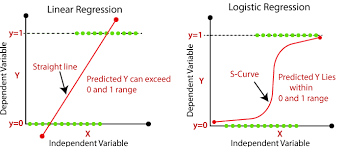

In [816]:
LR = LogisticRegression(C=0.1, solver='newton-cg')
LR_scaled = LogisticRegression(C=0.1, solver='newton-cg')

In [817]:
LR.fit(X_train, y_train)

LR_scaled.fit(scaled_X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [818]:
LR_preds = LR.predict(X_test)

LR_preds_scaled = LR_scaled.predict(scaled_X_test)

## Before Scaling Logistic Regression

In [819]:
accuracy_score(LR_preds, y_test)

0.951048951048951

In [820]:
confusion_matrix(LR_preds, y_test)

array([[73,  5],
       [ 2, 63]], dtype=int64)

### Benign

In [821]:
print('- precision_score:', precision_score(LR_preds, y_test, pos_label='B'))
print('- recall_score:', recall_score(LR_preds, y_test, pos_label='B'))
print('- f1_score:', f1_score(LR_preds, y_test, pos_label='B'))

- precision_score: 0.9733333333333334
- recall_score: 0.9358974358974359
- f1_score: 0.954248366013072


### Malignant

In [822]:
print('- precision_score:', precision_score(LR_preds, y_test, pos_label='M'))
print('- recall_score:', recall_score(LR_preds, y_test, pos_label='M'))
print('- f1_score:', f1_score(LR_preds, y_test, pos_label='M'))

- precision_score: 0.9264705882352942
- recall_score: 0.9692307692307692
- f1_score: 0.9473684210526316


## After Scaling Logistic Regression

In [823]:
Logistic_Regression_accuracy = accuracy_score(LR_preds_scaled, y_test)
Logistic_Regression_accuracy

0.958041958041958

In [824]:
confusion_matrix(LR_preds_scaled, y_test)

array([[72,  3],
       [ 3, 65]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression algorithm')

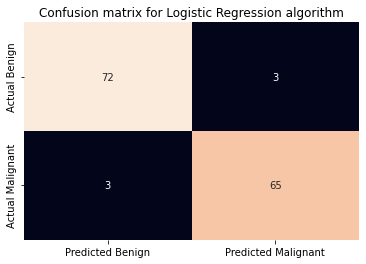

In [912]:
sns.heatmap(confusion_matrix(LR_preds_scaled, y_test), annot=True, cbar=False, xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion matrix for Logistic Regression algorithm')

### Benign

In [825]:
print('- precision_score:', precision_score(LR_preds_scaled, y_test, pos_label='B'))
print('- recall_score:', recall_score(LR_preds_scaled, y_test, pos_label='B'))
print('- f1_score:', f1_score(LR_preds_scaled, y_test, pos_label='B'))

- precision_score: 0.96
- recall_score: 0.96
- f1_score: 0.96


### Malignant

In [826]:
print('- precision_score:', precision_score(LR_preds_scaled, y_test, pos_label='M'))
print('- recall_score:', recall_score(LR_preds_scaled, y_test, pos_label='M'))
print('- f1_score:', f1_score(LR_preds_scaled, y_test, pos_label='M'))

- precision_score: 0.9558823529411765
- recall_score: 0.9558823529411765
- f1_score: 0.9558823529411765


# 2- K Nearest Neighbors Algorithm

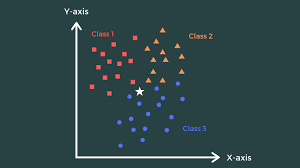

In [827]:
KNN = KNeighborsClassifier(n_neighbors=12, weights='distance', metric='manhattan', p=1, leaf_size=60)
KNN_scaled = KNeighborsClassifier(n_neighbors=12, weights='distance', metric='manhattan', p=1, leaf_size=60)

In [828]:
KNN.fit(X_train, y_train)

KNN_scaled.fit(scaled_X_train, y_train)

KNeighborsClassifier(leaf_size=60, metric='manhattan', n_neighbors=12, p=1,
                     weights='distance')

In [829]:
KNN_preds = KNN.predict(X_test)

KNN_preds_scaled = KNN_scaled.predict(scaled_X_test)

## Before Scaling K Nearest Neighbors

In [830]:
accuracy_score(KNN_preds, y_test)

0.9790209790209791

In [831]:
confusion_matrix(KNN_preds, y_test)

array([[73,  1],
       [ 2, 67]], dtype=int64)

### Benign

In [832]:
print('- precision_score:', precision_score(KNN_preds, y_test, pos_label='B'))
print('- recall_score:', recall_score(KNN_preds, y_test, pos_label='B'))
print('- f1_score:', f1_score(KNN_preds, y_test, pos_label='B'))

- precision_score: 0.9733333333333334
- recall_score: 0.9864864864864865
- f1_score: 0.9798657718120806


### Malignant

In [833]:
print('- precision_score:', precision_score(KNN_preds, y_test, pos_label='M'))
print('- recall_score:', recall_score(KNN_preds, y_test, pos_label='M'))
print('- f1_score:', f1_score(KNN_preds, y_test, pos_label='M'))

- precision_score: 0.9852941176470589
- recall_score: 0.9710144927536232
- f1_score: 0.9781021897810219


## After Scaling K Nearest Neighbors

In [834]:
KNN_accuracy = accuracy_score(KNN_preds_scaled, y_test)
KNN_accuracy

0.993006993006993

In [835]:
confusion_matrix(KNN_preds_scaled, y_test)

array([[74,  0],
       [ 1, 68]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for K Nearest Neighbors algorithm')

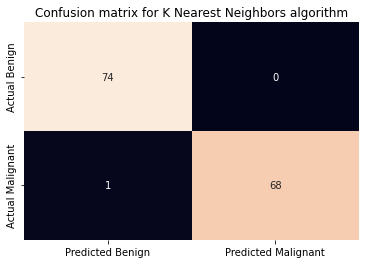

In [911]:
sns.heatmap(confusion_matrix(KNN_preds_scaled, y_test), annot=True, cbar=False, xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion matrix for K Nearest Neighbors algorithm')

### Benign

In [836]:
print('- precision_score:', precision_score(KNN_preds_scaled, y_test, pos_label='B'))
print('- recall_score:', recall_score(KNN_preds_scaled, y_test, pos_label='B'))
print('- f1_score:', f1_score(KNN_preds_scaled, y_test, pos_label='B'))

- precision_score: 0.9866666666666667
- recall_score: 1.0
- f1_score: 0.9932885906040269


### Malignant

In [837]:
print('- precision_score:', precision_score(KNN_preds_scaled, y_test, pos_label='M'))
print('- recall_score:', recall_score(KNN_preds_scaled, y_test, pos_label='M'))
print('- f1_score:', f1_score(KNN_preds_scaled, y_test, pos_label='M'))

- precision_score: 1.0
- recall_score: 0.9855072463768116
- f1_score: 0.9927007299270074


# 3- Decision Tree Algorithm

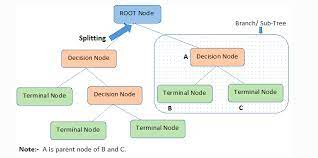

In [838]:
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_features='log2')
tree_classifier_scaled = DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [839]:
tree_classifier.fit(X_train, y_train)

tree_classifier_scaled.fit(scaled_X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [840]:
tree_preds = tree_classifier.predict(X_test)

tree_preds_scaled = tree_classifier_scaled.predict(scaled_X_test)

## Before Scaling Decision Tree

In [841]:
accuracy_score(tree_preds, y_test)

0.986013986013986

In [842]:
confusion_matrix(tree_preds, y_test)

array([[73,  0],
       [ 2, 68]], dtype=int64)

### Benign

In [843]:
print('- precision_score:', precision_score(tree_preds, y_test, pos_label='B'))
print('- recall_score:', recall_score(tree_preds, y_test, pos_label='B'))
print('- f1_score:', f1_score(tree_preds, y_test, pos_label='B'))

- precision_score: 0.9733333333333334
- recall_score: 1.0
- f1_score: 0.9864864864864865


### Malignant

In [844]:
print('- precision_score:', precision_score(tree_preds, y_test, pos_label='M'))
print('- recall_score:', recall_score(tree_preds, y_test, pos_label='M'))
print('- f1_score:', f1_score(tree_preds, y_test, pos_label='M'))

- precision_score: 1.0
- recall_score: 0.9714285714285714
- f1_score: 0.9855072463768115


## After Scaling Decision Tree

In [845]:
Decision_Tree_accuracy = accuracy_score(tree_preds_scaled, y_test)
Decision_Tree_accuracy

0.9440559440559441

In [846]:
confusion_matrix(tree_preds_scaled, y_test)

array([[68,  1],
       [ 7, 67]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for Decision Tree algorithm')

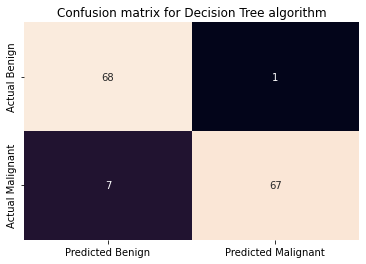

In [910]:
sns.heatmap(confusion_matrix(tree_preds_scaled, y_test), annot=True, cbar=False, xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion matrix for Decision Tree algorithm')

### Benign

In [847]:
print('- precision_score:', precision_score(tree_preds_scaled, y_test, pos_label='B'))
print('- recall_score:', recall_score(tree_preds_scaled, y_test, pos_label='B'))
print('- f1_score:', f1_score(tree_preds_scaled, y_test, pos_label='B'))

- precision_score: 0.9066666666666666
- recall_score: 0.9855072463768116
- f1_score: 0.9444444444444444


### Malignant

In [848]:
print('- precision_score:', precision_score(tree_preds_scaled, y_test, pos_label='M'))
print('- recall_score:', recall_score(tree_preds_scaled, y_test, pos_label='M'))
print('- f1_score:', f1_score(tree_preds_scaled, y_test, pos_label='M'))

- precision_score: 0.9852941176470589
- recall_score: 0.9054054054054054
- f1_score: 0.943661971830986


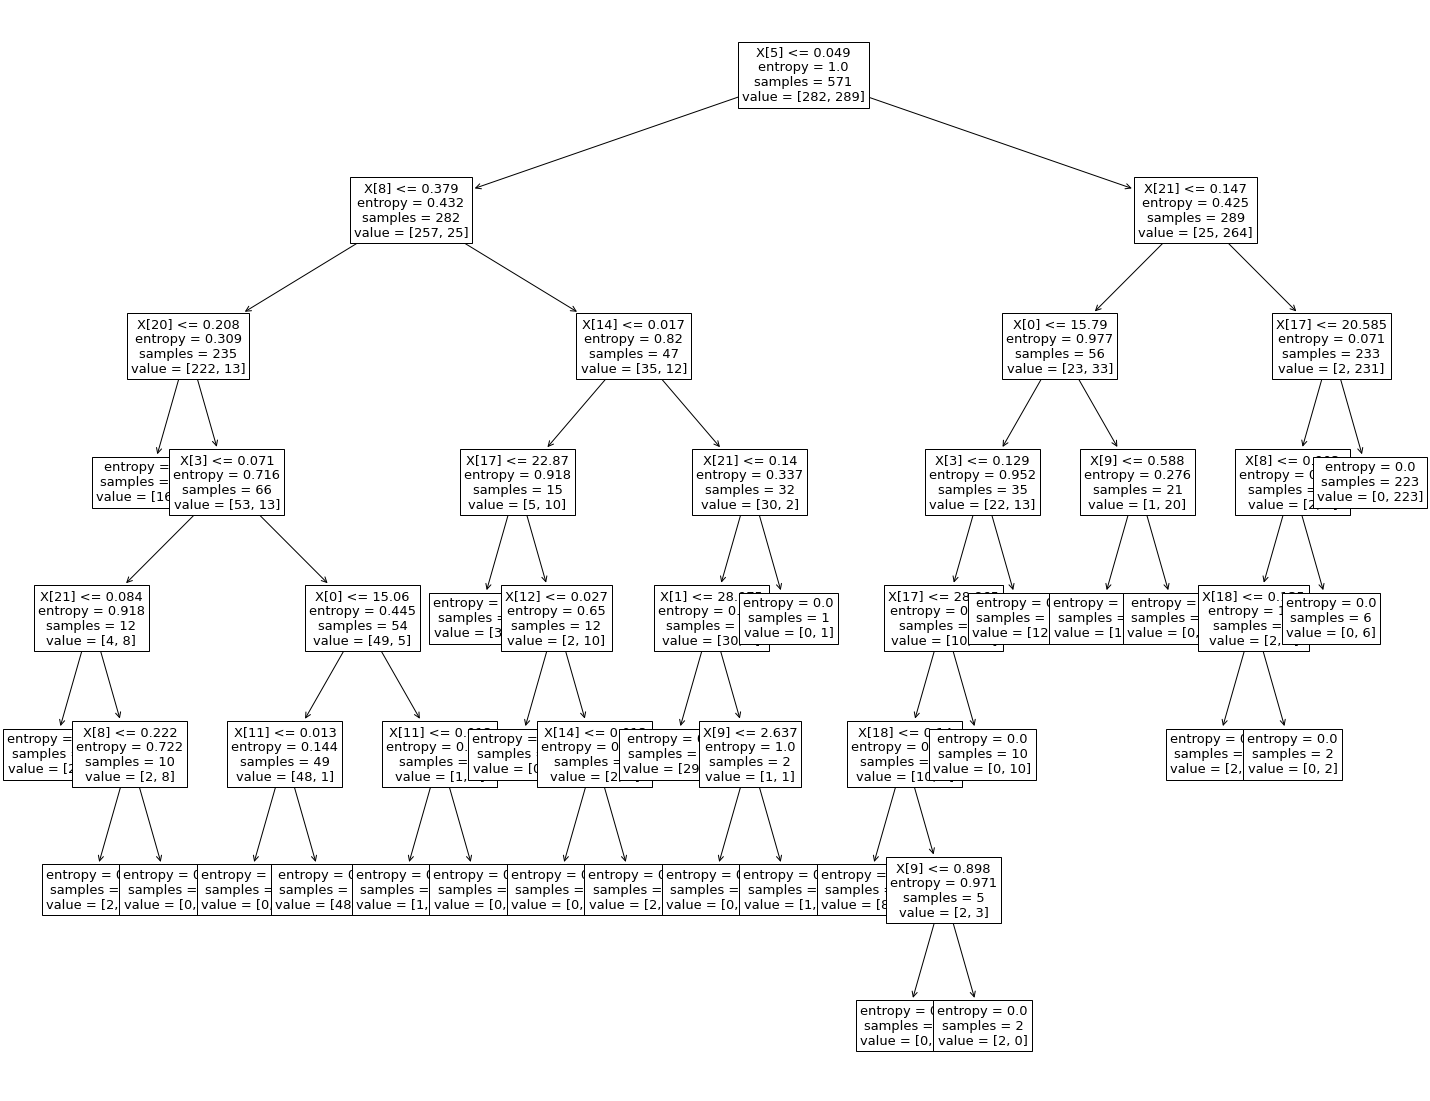

In [849]:
plt.subplots(figsize=(25, 20))
plot_tree(tree_classifier, fontsize=13)
plt.show()

# 4- Random Forest Algorithm

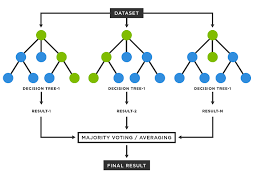

In [887]:
RFC_classifier = RandomForestClassifier(n_estimators=500, criterion='entropy')
RFC_classifier_scaled = RandomForestClassifier(n_estimators=500, criterion='entropy')

In [888]:
RFC_classifier.fit(X_train, y_train)
RFC_classifier_scaled.fit(scaled_X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [889]:
RFC_preds = RFC_classifier.predict(X_test)
RFC_preds_scaled = RFC_classifier_scaled.predict(scaled_X_test)

## Before Scaling Random Forest

In [890]:
accuracy_score(RFC_preds, y_test)

0.986013986013986

In [891]:
confusion_matrix(RFC_preds, y_test)

array([[73,  0],
       [ 2, 68]], dtype=int64)

### Benign

In [892]:
print('- precision_score:', precision_score(RFC_preds, y_test, pos_label='B'))
print('- recall_score:', recall_score(RFC_preds, y_test, pos_label='B'))
print('- f1_score:', f1_score(RFC_preds, y_test, pos_label='B'))

- precision_score: 0.9733333333333334
- recall_score: 1.0
- f1_score: 0.9864864864864865


### Malignant

In [893]:
print('- precision_score:', precision_score(RFC_preds, y_test, pos_label='M'))
print('- recall_score:', recall_score(RFC_preds, y_test, pos_label='M'))
print('- f1_score:', f1_score(RFC_preds, y_test, pos_label='M'))

- precision_score: 1.0
- recall_score: 0.9714285714285714
- f1_score: 0.9855072463768115


## After Scaling Random Forest

In [894]:
Random_Forest_accuracy = accuracy_score(RFC_preds_scaled, y_test)
Random_Forest_accuracy

0.986013986013986

In [895]:
confusion_matrix(RFC_preds_scaled, y_test)

array([[73,  0],
       [ 2, 68]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for Random Forest algorithm')

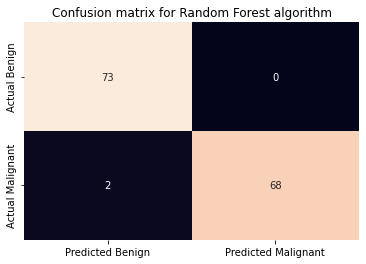

In [909]:
sns.heatmap(confusion_matrix(RFC_preds_scaled, y_test), annot=True, cbar=False, xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion matrix for Random Forest algorithm')


### Benign

In [859]:
print('- precision_score:', precision_score(RFC_preds_scaled, y_test, pos_label='B'))
print('- recall_score:', recall_score(RFC_preds_scaled, y_test, pos_label='B'))
print('- f1_score:', f1_score(RFC_preds_scaled, y_test, pos_label='B'))

- precision_score: 0.9733333333333334
- recall_score: 1.0
- f1_score: 0.9864864864864865


### Malignant

In [860]:
print('- precision_score:', precision_score(RFC_preds_scaled, y_test, pos_label='M'))
print('- recall_score:', recall_score(RFC_preds_scaled, y_test, pos_label='M'))
print('- f1_score:', f1_score(RFC_preds_scaled, y_test, pos_label='M'))

- precision_score: 1.0
- recall_score: 0.9714285714285714
- f1_score: 0.9855072463768115


In [861]:
df= pd.DataFrame(columns=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'])

df['Logistic Regression'] = [Logistic_Regression_accuracy*100]
df['KNN'] = [KNN_accuracy*100]
df['Decision Tree'] = [Decision_Tree_accuracy*100]
df['Random Forest'] = [Random_Forest_accuracy*100]

In [862]:
df

,Logistic Regression,KNN,Decision Tree,Random Forest
0,95.804196,99.300699,94.405594,98.601399


Text(0.5, 1.0, 'Models Accuracies')

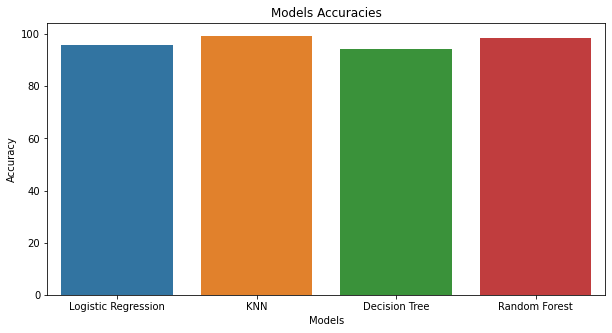

In [896]:
plt.subplots(figsize=(10, 5))
sns.barplot(data=df)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Accuracies')

In [513]:
# # Define a function to detect outliers
# def remove_outliers(X, y, f=2, distance=1.5):
    
#     """The Function receive Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
#     and return features and labels without outliers (good_X, good_y)"""
    
#     outliers  = []

#     # For each feature find the data points with extreme high or low values
#     for feature in X.keys():

#         # Calculate Q1 (25th percentile of the data) for the given feature
#         Q1 = np.percentile(X[feature], 25)

#         # Calculate Q3 (75th percentile of the data) for the given feature
#         Q3 = np.percentile(X[feature], 75)

#         # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
#         step = (Q3 - Q1) * distance

#         outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

#     # Select the indices for data points you wish to remove
#     flat_list = [item for sublist in outliers for item in sublist]

#     # importing Counter
#     from collections import Counter
    
#     freq = Counter(flat_list)
#     # Create a list to store outliers to remove
#     outliers_to_remove = []
    
#     for key, value in freq.items():
#         if value > f:
#             outliers_to_remove.append(key)

#     # Remove the outliers, if any were specified
#     good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
#     good_y = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
#     # Sort list
#     outliers_to_remove.sort()
#     # Print outliers founded
#     for i in range(len(outliers_to_remove)):
#         print( "data point: ", outliers_to_remove[i], "is considered outlier to more than ", f, " feature" )

#     print( "All ", len(outliers_to_remove), "were removed!" )
#     # return data without outliers
#     return good_X, good_y 


# good_X, good_y = remove_outliers(breast_cancer_dataset, y, f=2, distance=1.5)